# Part 1

This is very incomplete but my lack of familiarity with python means this will likely be non-functional for the forseeable future.  I hope the intention here is clear but I don't believe I have the skills to finish this kmeans implementation.

In [1]:
import numpy as np

In [19]:
def get_clusters(data: np.ndarray, n_clusters: int) -> tuple[np.ndarray, np.ndarray]:
  # Fill in the details.  This function should probably consist of some kind of loop,
  # and the work within that loop should mostly be done via calls to other functions
  # that you define and that carry out small, specific tasks

  centroids = []
  for x in range(n_clusters):
    centroids.append(data[np.random.randint(0, data.shape[0])])
  centroids = np.array(centroids)
  closest_centroids = np.copy(data)
  old_centroids = np.zeros(centroids.shape)

  while(centroids != old_centroids):
    old_centroids = centroids
    for point in closest_centroids:
      closest_centroids[point][0] = distance(point, centroids)
      centroids = update_centroids(closest_centroids)

  # Return the centroids and the closest centroid for each datapoint
  return centroids, closest_centroids

In [20]:
def distance(point, data):
  return np.sqrt(np.sum((point - data)**2, axis=1))

In [21]:
def update_centroids():
  return

In [22]:
def closest_centroid(point, centroids):
  distances = []
  for centroid in centroids:
    distances.append(distance(data, centroid))
  return np.argmin(distances)

# Part 2

Overall KMeans works basically as expected.  From just looking at the numbers the centroids when using 4 clusters are pretty close the the real centers.  Shrinking the cov values by .1 seems to throw off the algorithm based on the results including exponentials.  Creating 3 centroids looks to me to still give decent results for their locations.  

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
# These are the "actual" centers in the x-y plane
cluster_centers = [
    (0, 0),
    (2, 0),
    (0, 1),
    (3, 2)
]
# The values change how "spread out" the data is.  Feel feel to play with them.
# The bigger the values, the more spread out the data points.  These values need to represent
# symmetric matrices
covs = [
    [[.25, 0], [0, .3]],
    [[.5, .1], [.1, .5]],
    [[.25, 0], [0, .25]],
    [[.5, 0], [0, .5]],
]
n_pts_per_cluster = 20

data = []
for ix, cluster in enumerate(cluster_centers):
    cov = covs[ix]
    samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
    data += [(ix, s[0], s[1]) for s in samples]

data = pd.DataFrame(data, columns=['label', 'x', 'y'])

<Axes: xlabel='x', ylabel='y'>

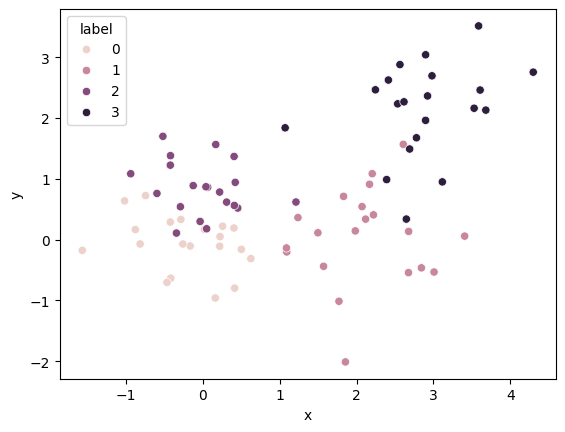

In [5]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)

In [23]:
from sklearn.cluster import KMeans

In [27]:
data = data.drop(columns=['label'])

In [28]:
kmeans = KMeans(n_clusters=3, random_state=6).fit(data)

In [29]:
kmeans.cluster_centers_

array([[ 2.99101828,  2.37010067],
       [-0.10825388,  0.41988798],
       [ 2.11598571,  0.10314907]])

In [30]:
kmeans = KMeans(n_clusters=4, random_state=6).fit(data)
kmeans.cluster_centers_

array([[ 3.03668908,  2.48216261],
       [-0.17397822,  0.43418897],
       [ 2.37217758,  0.81204499],
       [ 1.63294279, -0.37188581]])

In [37]:
randcovs = [
    [[.15, 0], [0, .2]],
    [[.4, .0], [.0, .4]],
    [[.15, 0], [0, .15]],
    [[.4, 0], [0, .4]],
]

data_randcovs = []
for ix, cluster in enumerate(cluster_centers):
    cov = randcovs[ix]
    samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
    data_randcovs += [(ix, s[0], s[1]) for s in samples]

data_randcovs = pd.DataFrame(data_randcovs, columns=['label', 'x', 'y'])

<Axes: xlabel='x', ylabel='y'>

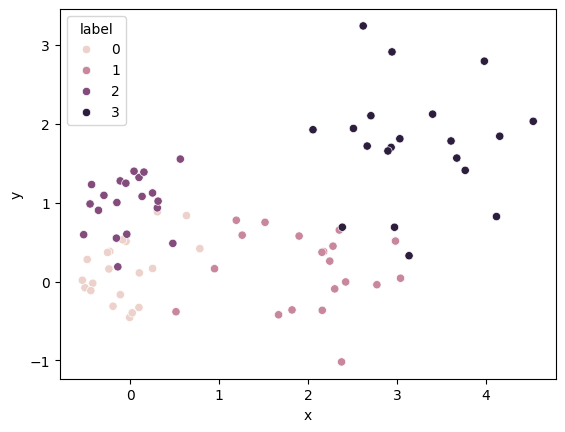

In [38]:
sns.scatterplot(
    data=data_randcovs,
    x='x',
    y='y',
    hue='label'
)

In [39]:
data_randcovs = data_randcovs.drop(columns=['label'])

In [41]:
kmeans = KMeans(n_clusters=4, random_state=6).fit(data_randcovs)
kmeans.cluster_centers_

array([[ 3.27051263e+00,  1.96340847e+00],
       [ 1.58780827e-01,  9.31807704e-01],
       [ 2.29504578e+00,  1.98864862e-01],
       [-1.74986383e-01, -1.29443689e-04]])